<a href="https://colab.research.google.com/github/rafaelpds/Projetos_Data_Science/blob/main/Previsao_Aprovacao_Credito/Modelo_Preditivo_Aprovacao_Credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()

# Sampling Methods
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek

In [145]:
df_train = pd.read_csv('treino.csv')
df_test = pd.read_csv('teste.csv')

In [146]:
df_train.head()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [147]:
df_test.head()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,0.025849,62,0,0.081775,8180.0,3,0,2,0,0.0
1,0.667083,55,0,0.153112,2200.0,3,0,0,0,0.0
2,0.007093,44,0,0.148800,7499.0,20,0,1,0,0.0
3,0.091213,54,0,0.351635,5900.0,15,0,1,1,0.0
4,0.112680,54,0,0.065959,2167.0,3,0,0,0,0.0


In [148]:
df_train.columns

Index(['inadimplente', 'util_linhas_inseguras', 'idade',
       'vezes_passou_de_30_59_dias', 'razao_debito', 'salario_mensal',
       'numero_linhas_crdto_aberto', 'numero_vezes_passou_90_dias',
       'numero_emprestimos_imobiliarios',
       'numero_de_vezes_que_passou_60_89_dias', 'numero_de_dependentes'],
      dtype='object')

### Análise Estatistica

In [149]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 11 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   inadimplente                           110000 non-null  int64  
 1   util_linhas_inseguras                  110000 non-null  float64
 2   idade                                  110000 non-null  int64  
 3   vezes_passou_de_30_59_dias             110000 non-null  int64  
 4   razao_debito                           110000 non-null  float64
 5   salario_mensal                         88237 non-null   float64
 6   numero_linhas_crdto_aberto             110000 non-null  int64  
 7   numero_vezes_passou_90_dias            110000 non-null  int64  
 8   numero_emprestimos_imobiliarios        110000 non-null  int64  
 9   numero_de_vezes_que_passou_60_89_dias  110000 non-null  int64  
 10  numero_de_dependentes                  107122 non-null  

In [150]:
df_train.describe()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
count,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,8.823700e+04,110000.000000,110000.000000,110000.000000,110000.000000,107122.000000
mean,0.066645,5.929979,52.255636,0.424055,354.823589,6.637411e+03,8.445573,0.269955,1.019891,0.243891,0.757482
std,0.249408,252.301965,14.768241,4.240780,2074.140421,1.338395e+04,5.139026,4.217326,1.135989,4.204137,1.114670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030054,41.000000,0.000000,0.175016,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.155936,52.000000,0.000000,0.366682,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.562806,63.000000,0.000000,0.866874,8.225000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [151]:
#Porcentagem de numeros em branco
df_train.isnull().sum() / len(df_train)*100

inadimplente                              0.000000
util_linhas_inseguras                     0.000000
idade                                     0.000000
vezes_passou_de_30_59_dias                0.000000
razao_debito                              0.000000
salario_mensal                           19.784545
numero_linhas_crdto_aberto                0.000000
numero_vezes_passou_90_dias               0.000000
numero_emprestimos_imobiliarios           0.000000
numero_de_vezes_que_passou_60_89_dias     0.000000
numero_de_dependentes                     2.616364
dtype: float64

In [152]:
#Verificando se tem campos em branco
df_test.isnull().sum()

util_linhas_inseguras                       0
idade                                       0
vezes_passou_de_30_59_dias                  0
razao_debito                                0
salario_mensal                           7968
numero_linhas_crdto_aberto                  0
numero_vezes_passou_90_dias                 0
numero_emprestimos_imobiliarios             0
numero_de_vezes_que_passou_60_89_dias       0
numero_de_dependentes                    1046
dtype: int64

In [153]:
df_train[(df_train['salario_mensal'].isnull()) & (df_train['inadimplente'] == 1)]

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
179,1,0.946964,35,0,1593.0,NaN,6,0,1,0,1.0
214,1,0.655316,63,0,5223.0,NaN,19,0,2,0,0.0
354,1,0.953344,48,2,2073.0,NaN,5,1,2,2,0.0
398,1,0.802417,58,1,668.0,NaN,5,1,0,0,0.0
789,1,1.008507,58,3,3265.0,NaN,20,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
109616,1,1.000000,48,0,1761.0,NaN,7,0,0,0,0.0
109714,1,0.900119,43,1,1493.0,NaN,14,0,0,1,NaN
109716,1,0.578842,47,0,1460.0,NaN,2,0,1,0,0.0
109774,1,1.000000,62,0,53.0,NaN,0,0,0,0,0.0


## Criando baseline

### Tratamento do Dataset

In [154]:
#Preenchendo os campos em branco de maneira aleatoria para criar a baseline

df_train['salario_mensal'].fillna(-1, inplace = True)
df_train['numero_de_dependentes'].fillna(-1, inplace = True)
df_test['salario_mensal'].fillna(-1, inplace = True)
df_test['numero_de_dependentes'].fillna(-1, inplace = True)

In [155]:
df_train.isnull().sum()

inadimplente                             0
util_linhas_inseguras                    0
idade                                    0
vezes_passou_de_30_59_dias               0
razao_debito                             0
salario_mensal                           0
numero_linhas_crdto_aberto               0
numero_vezes_passou_90_dias              0
numero_emprestimos_imobiliarios          0
numero_de_vezes_que_passou_60_89_dias    0
numero_de_dependentes                    0
dtype: int64

In [156]:
df_test.isnull().sum()

util_linhas_inseguras                    0
idade                                    0
vezes_passou_de_30_59_dias               0
razao_debito                             0
salario_mensal                           0
numero_linhas_crdto_aberto               0
numero_vezes_passou_90_dias              0
numero_emprestimos_imobiliarios          0
numero_de_vezes_que_passou_60_89_dias    0
numero_de_dependentes                    0
dtype: int64

In [157]:
total_inadimplente = df_train.inadimplente.value_counts() / len(df_train)
total_inadimplente

0    0.933355
1    0.066645
Name: inadimplente, dtype: float64

A classe está desbalanceada, pois a maioria dos casos não são inadimplentes

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
inadimplente,1.000000,-0.003263,-0.114281,0.124546,-0.006534,-0.014002,-0.029332,0.116023,-0.008144,0.101536,0.044728
util_linhas_inseguras,-0.003263,1.000000,-0.004444,-0.001336,0.001255,0.007285,-0.010120,-0.001154,0.007590,-0.001105,-0.002077
idade,-0.114281,-0.004444,1.000000,-0.063230,0.025221,0.005342,0.148640,-0.061371,0.032920,-0.057604,-0.221090
vezes_passou_de_30_59_dias,0.124546,-0.001336,-0.063230,1.000000,-0.006860,-0.011853,-0.056347,0.984157,-0.031093,0.987377,-0.007989
razao_debito,-0.006534,0.001255,0.025221,-0.006860,1.000000,-0.074143,0.047158,-0.008344,0.117054,-0.007558,-0.052581
salario_mensal,-0.014002,0.007285,0.005342,-0.011853,-0.074143,1.000000,0.110981,-0.015425,0.132617,-0.014289,0.112412
numero_linhas_crdto_aberto,-0.029332,-0.010120,0.148640,-0.056347,0.047158,0.110981,1.000000,-0.080873,0.433337,-0.071979,0.085158
numero_vezes_passou_90_dias,0.116023,-0.001154,-0.061371,0.984157,-0.008344,-0.015425,-0.080873,1.000000,-0.045902,0.993162,-0.015901
numero_emprestimos_imobiliarios,-0.008144,0.007590,0.032920,-0.031093,0.117054,0.132617,0.433337,-0.045902,1.000000,-0.039987,0.132922
numero_de_vezes_que_passou_60_89_dias,0.101536,-0.001105,-0.057604,0.987377,-0.007558,-0.014289,-0.071979,0.993162,-0.039987,1.000000,-0.016519


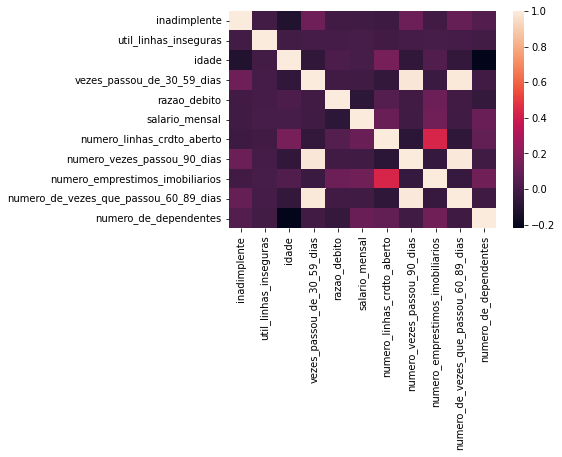

In [17]:
corr = df_train.corr()
corr = (corr)
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
corr

**Questões**

Quais atributos afetam a variável alvo(inadimplente)?
Existem atributos com alta correlação entre eles?

**Resumo**

DESCREVER AS RESPOSTAS

**Separando os conjuntos de dados**

In [158]:
target_name = 'inadimplente'
X = df_train.drop('inadimplente', axis=1)
y = df_train[target_name]

In [22]:
X.head()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [23]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: inadimplente, dtype: int64

In [75]:
oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (110000, 10)
Shape of X after SMOTE: (205338, 10)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: inadimplente, dtype: float64

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [160]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.50)

In [161]:
dtree = DecisionTreeClassifier(max_depth=5, random_state=0)
dtree = dtree.fit(X_train, y_train)

In [162]:
p_val = dtree.predict(X_val)

In [163]:
np.mean(y_val == p_val)

0.9354727272727272

**Resultado testeando o Maxdepth**

None -> 0.8974181818181818

1 -> 0.9334545454545454

5 -> 0.9354727272727272

10 -> 0.932509090909091


**Resultado testeando o min_samples_leaf**

None -> 0.8978727272727273

1 -> 0.8978727272727273

5 -> 0.919290909090909

10 -> 0.9280363636363637

In [165]:
p_val = (X_val['numero_vezes_passou_90_dias'] == 1).astype(np.int64)
np.mean(y_val == p_val)

0.9219272727272727

[Text(0.5, 0.9166666666666666, 'numero_vezes_passou_90_dias <= 0.5\ngini = 0.125\nsamples = 55000\nvalue = [51329, 3671]'),
 Text(0.25, 0.75, 'util_linhas_inseguras <= 0.667\ngini = 0.088\nsamples = 51922\nvalue = [49521, 2401]'),
 Text(0.125, 0.5833333333333334, 'vezes_passou_de_30_59_dias <= 0.5\ngini = 0.051\nsamples = 42318\nvalue = [41202, 1116]'),
 Text(0.0625, 0.4166666666666667, 'numero_de_vezes_que_passou_60_89_dias <= 0.5\ngini = 0.036\nsamples = 37605\nvalue = [36921, 684]'),
 Text(0.03125, 0.25, 'util_linhas_inseguras <= 0.323\ngini = 0.033\nsamples = 37064\nvalue = [36440, 624]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.025\nsamples = 30707\nvalue = [30322, 385]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.072\nsamples = 6357\nvalue = [6118, 239]'),
 Text(0.09375, 0.25, 'numero_de_vezes_que_passou_60_89_dias <= 1.5\ngini = 0.197\nsamples = 541\nvalue = [481, 60]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.169\nsamples = 495\nvalue = [449, 46]'),
 Text(0.1

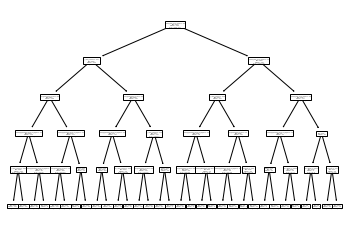

In [130]:
plot_tree(dtree, feature_names=X_train.columns)

In [ ]:
X_test = df_test

In [ ]:
X_train.shape, y_train.shape, X_test.shape

In [139]:
p = dtree.predict(X_test)

In [143]:
acc_dtree = round(dtree.score(X_train, y_train) * 100, 2)
acc_dtree

93.68

**Transformando os dados**

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [79]:
X_sm = scaler.fit_transform(X)

In [80]:
X_sm

array([[1.51085945e-05, 4.12844037e-01, 2.04081633e-02, ...,
        1.11111111e-01, 0.00000000e+00, 1.42857143e-01],
       [1.88757399e-05, 3.66972477e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.52380952e-02],
       [1.29798087e-05, 3.48623853e-01, 1.02040816e-02, ...,
        0.00000000e+00, 0.00000000e+00, 4.76190476e-02],
       ...,
       [3.57453084e-06, 3.94495413e-01, 0.00000000e+00, ...,
        3.70370370e-02, 0.00000000e+00, 1.42857143e-01],
       [7.43461702e-07, 7.88990826e-01, 0.00000000e+00, ...,
        3.70370370e-02, 0.00000000e+00, 9.52380952e-02],
       [1.97207521e-05, 5.22935780e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.76190476e-02]])

In [137]:
X_test = df_test

In [138]:
X_train.shape, y_train.shape, X_test.shape

((55000, 10), (55000,), (40000, 10))

In [33]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

In [34]:
importances = dtree.feature_importances_
feat_names = df_train.drop(['inadimplente'], axis=1).columns

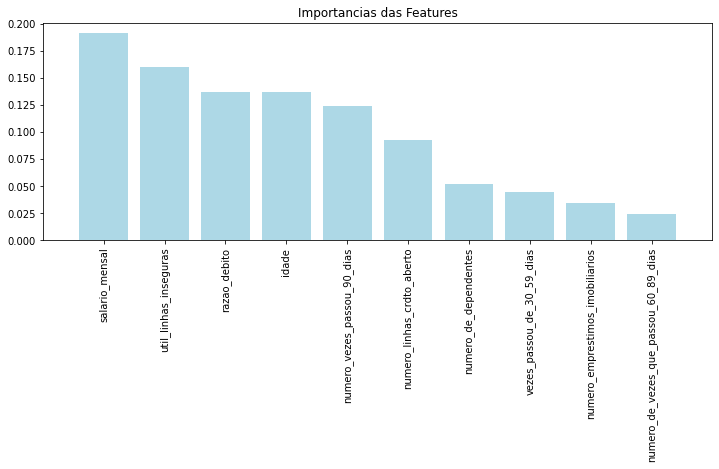

In [38]:
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,4))
plt.title("Importancias das Features")
plt.bar(range(len(indices)), importances[indices],color='lightblue')
plt.xticks(range(len(indices)), feat_names[indices], rotation = 'vertical')
plt.xlim([-1, len(indices)])
plt.show()

**Filtrando apenas os atributos relevantes**

In [43]:
X = df_train[["salario_mensal", "util_linhas_inseguras", "razao_debito", "idade", "numero_vezes_passou_90_dias", "numero_linhas_crdto_aberto"]]

In [53]:
X_prev = df_test[["salario_mensal", "util_linhas_inseguras", "razao_debito", "idade", "numero_vezes_passou_90_dias", "numero_linhas_crdto_aberto"]]

In [44]:
X = scaler.fit_transform(X)

In [45]:
X

array([[3.03149048e-03, 1.51085945e-05, 2.43575922e-06, 4.12844037e-01,
        0.00000000e+00, 2.24137931e-01],
       [8.64478317e-04, 1.88757399e-05, 3.69698241e-07, 3.66972477e-01,
        0.00000000e+00, 6.89655172e-02],
       [1.01138313e-03, 1.29798087e-05, 2.58182195e-07, 3.48623853e-01,
        1.02040816e-02, 3.44827586e-02],
       ...,
       [3.98869830e-03, 3.57453084e-06, 1.16068112e-06, 3.94495413e-01,
        0.00000000e+00, 2.24137931e-01],
       [2.32687916e-03, 7.43461702e-07, 7.52606936e-07, 7.88990826e-01,
        0.00000000e+00, 2.41379310e-01],
       [1.27162401e-03, 1.97207521e-05, 7.13552587e-09, 5.22935780e-01,
        0.00000000e+00, 1.72413793e-02]])

In [58]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

In [61]:
y_predict = dtree.predict(X_prev)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



In [62]:
y_predict

array([1, 1, 1, ..., 1, 1, 0])

In [64]:
def accuracy_result (y, y_predict):
  acc = accuracy_score(y, y_predict)
  print("Accuracy = %2.2f" % acc)

In [71]:
y.shape

(110000,)

In [72]:
y_predict.shape

(40000,)

**Função do modelo baseline**

In [46]:
def baseline_model(X):
  y = np.zeros(X.shape[0])
  return y

**Importando o método de métrica de avaliação**

In [48]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report